In [1]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]

tss_annotation = doc['tss_annotation']


import os
os.chdir
import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
##mpl.use('Agg')
#mpl.style.use('ggplot')
#mpl.style.use('fivethirtyeight')
from Homer import *

print('Number of tissues: ',len(tissues))

('Number of tissues: ', 15)


## Create directory

In [2]:
if not os.path.exists("Results/Figures/Figure3/Data/"):
    os.makedirs("Results/Figures/Figure3/Data/")
    
if not os.path.exists("Results/Figures/Figure3/Distance_to_Anno/"):
    os.makedirs("Results/Figures/Figure3/Distance_to_Anno/")

# Panel A + B 
A: histogram  
B: Heat map

peak options:  
1) From output   
2) From txn_df peaks  
3) CHO-specific  
4) From output but peak 1 vs others .  

Tag Options:  
1) All merged  
2) CHO-Specific

## i. Peak option 1; Tag option 1

In [3]:
## Create RefSeq peak file for this
peak_f = "Results/output/TSS1.exp.bed"
i = peak_f
tag_f = "Results/merged/tags_TSS_merged"


#i = "Results/tss_annotation_peaks/all_peaks_gene_df_01.tsv"
mrna_filt = "Results/Figures/Figure3/A.mrna"
peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt,is_peak=False,is_bed=True)


,transcript_id,Chr,Start,End,Strand,actual_start,ID,Parent,gene_id,gene,cs
3,asmbl_5,picr_0,44541,44543,-,44543,asmbl_5,gene_2,gene_2,RRP7A,2
4,asmbl_6,picr_0,45911,45913,-,45913,asmbl_6,gene_2,gene_2,RRP7A,1
5,asmbl_4,picr_0,46629,46631,-,46631,asmbl_4,gene_2,gene_2,RRP7A,1
6,asmbl_7,picr_0,44596,44598,-,44598,asmbl_7,gene_2,gene_2,RRP7A,1
7,asmbl_8,picr_0,44596,44598,-,44598,asmbl_8,gene_2,gene_2,RRP7A,1
8,asmbl_9,picr_0,44567,44569,-,44569,asmbl_9,gene_2,gene_2,RRP7A,1
9,asmbl_10,picr_0,44512,44514,-,44514,asmbl_10,gene_2,gene_2,RRP7A,1
11,asmbl_12,picr_0,20786,20788,+,20786,asmbl_12,gene_1_4,gene_1_4,SERHL,2
12,asmbl_13,picr_0,20941,20943,+,20941,asmbl_13,gene_1_4,gene_1_4,SERHL,2
13,asmbl_14,picr_0,20941,20943,+,20941,asmbl_14,gene_1_4,gene_1_4,SERHL,2


('output histogram mrna', 'Results/Figures/Figure3/A.mrna.hist')
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -d Results/merged/tags_TSS_merged -pc 3 > Results/Figures/Figure3/A.mrna.hist
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d Results/merged/tags_TSS_merged -pc 3 > Results/Figures/Figure3/A.mrna.histNorm
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d Results/merged/tags_TSS_merged -pc 3 -strand + > Results/Figures/Figure3/A.mrna.histMatS
annotatePeaks.pl Results/Figures/Figure3/A.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/fin

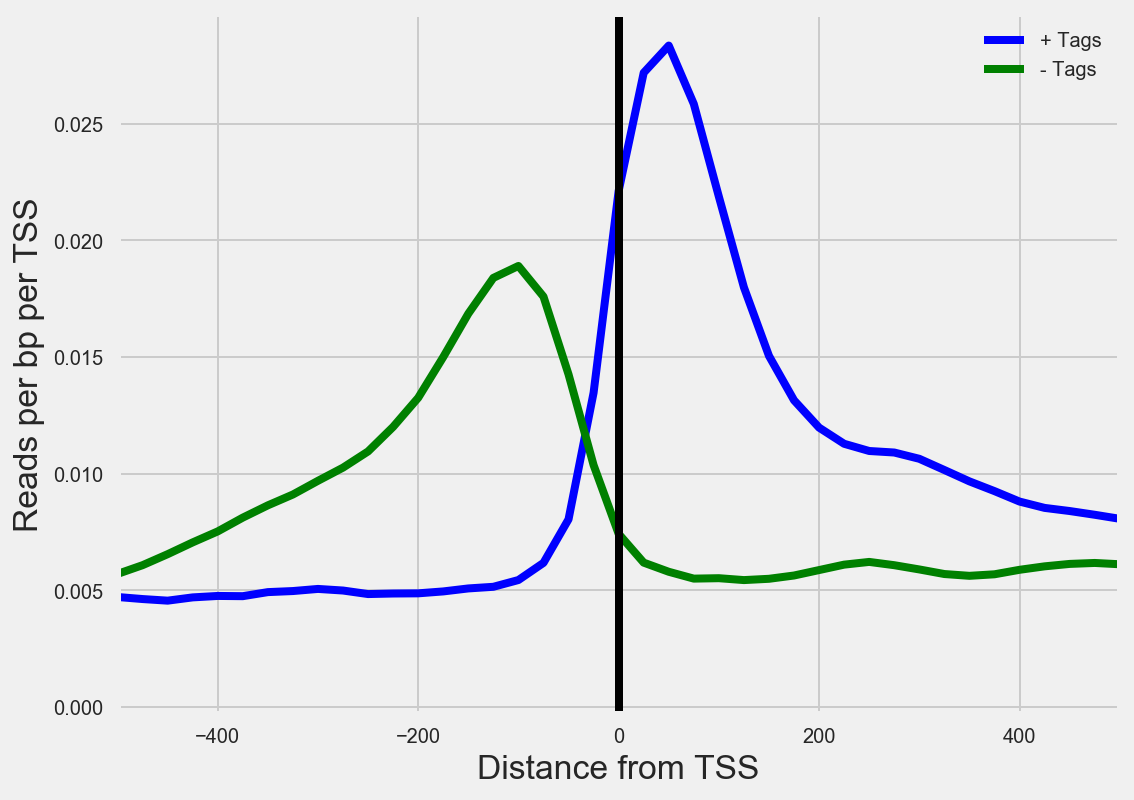

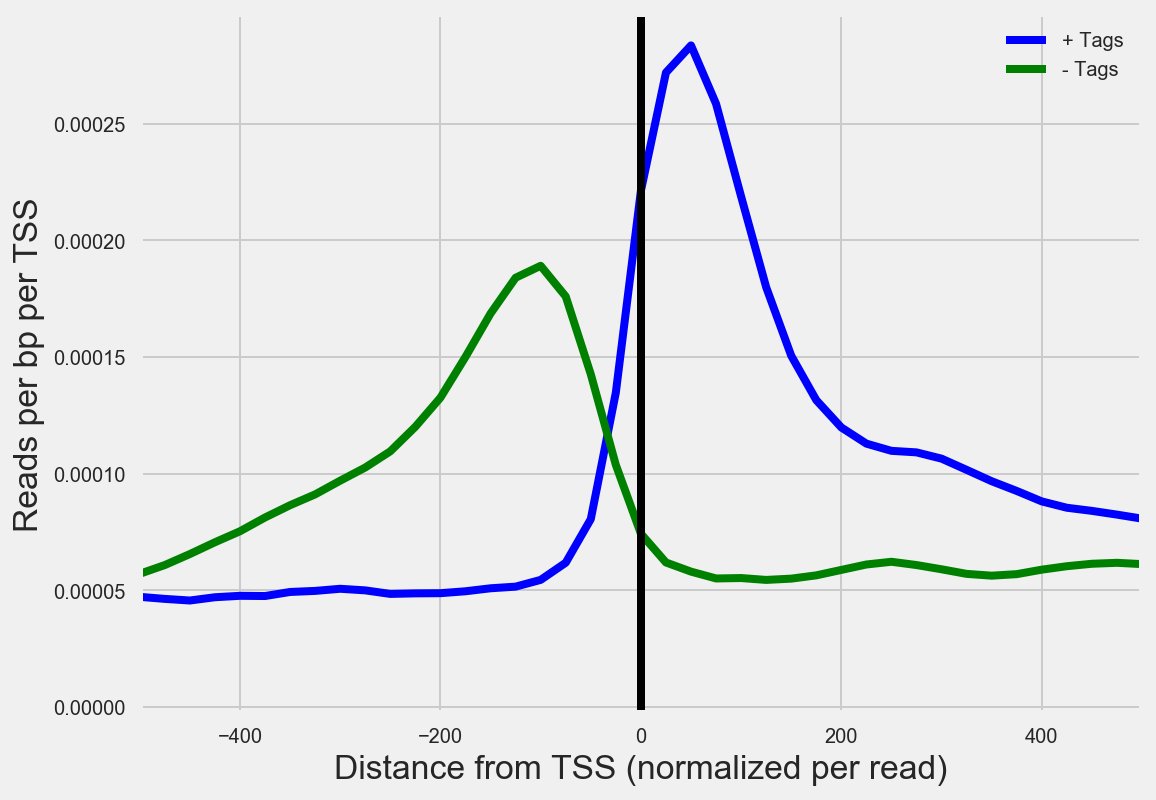

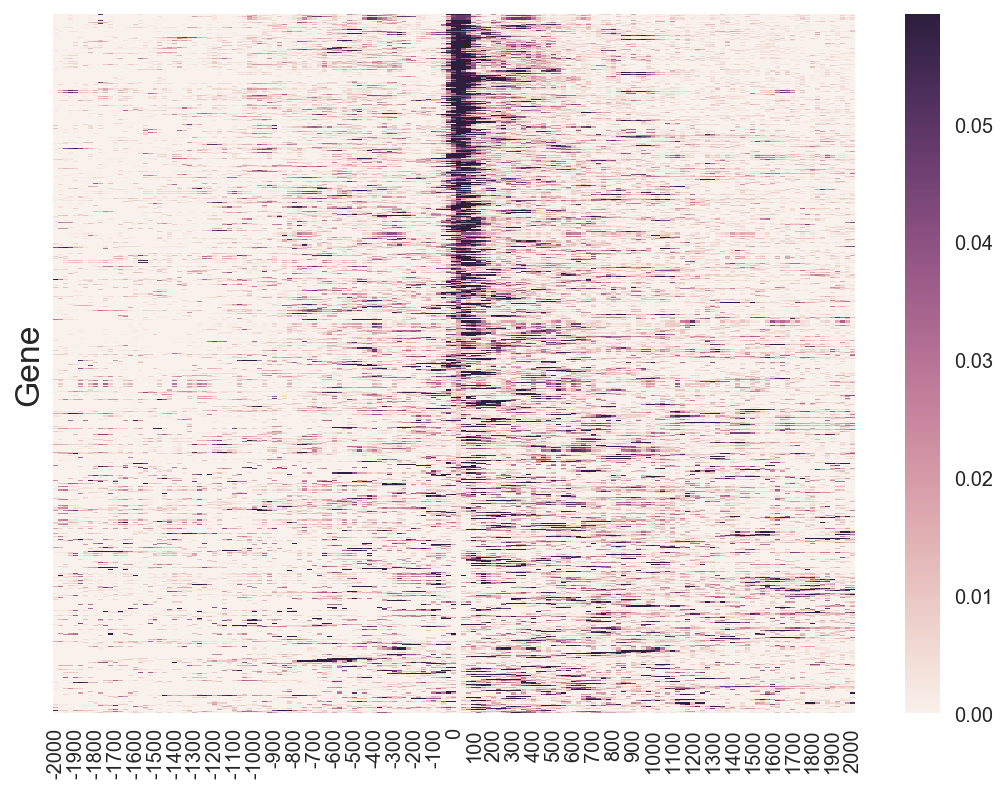

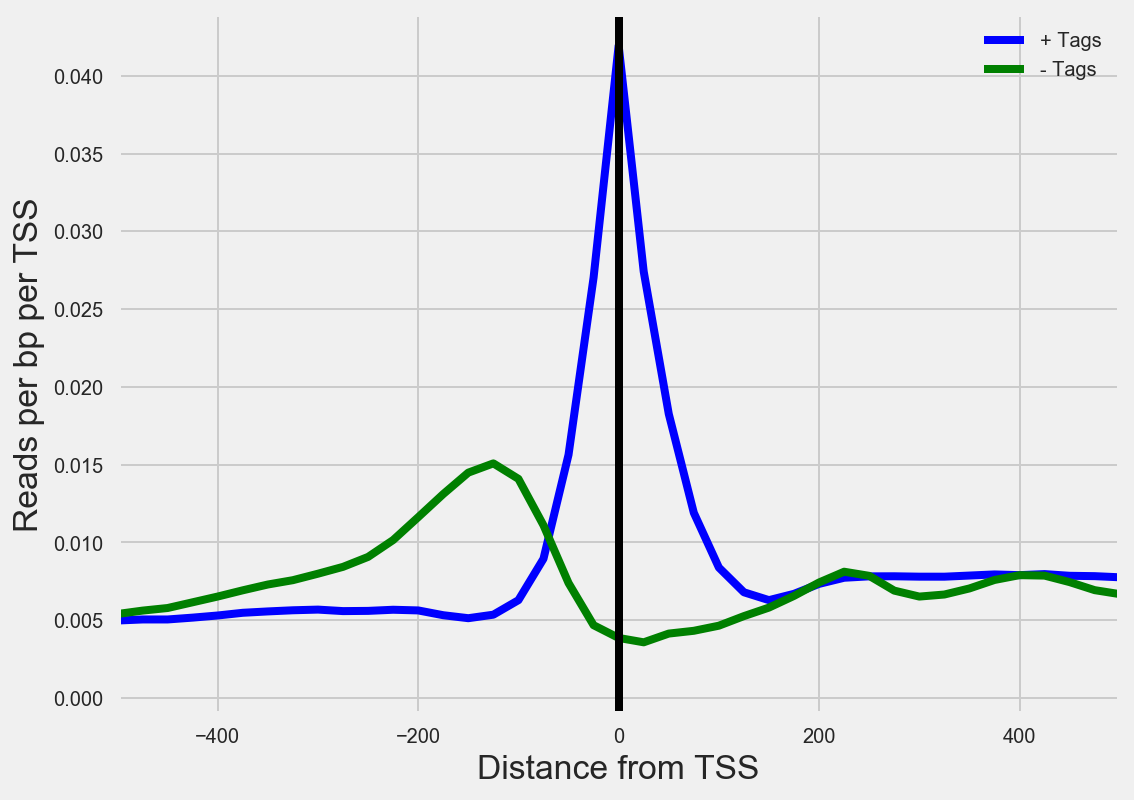

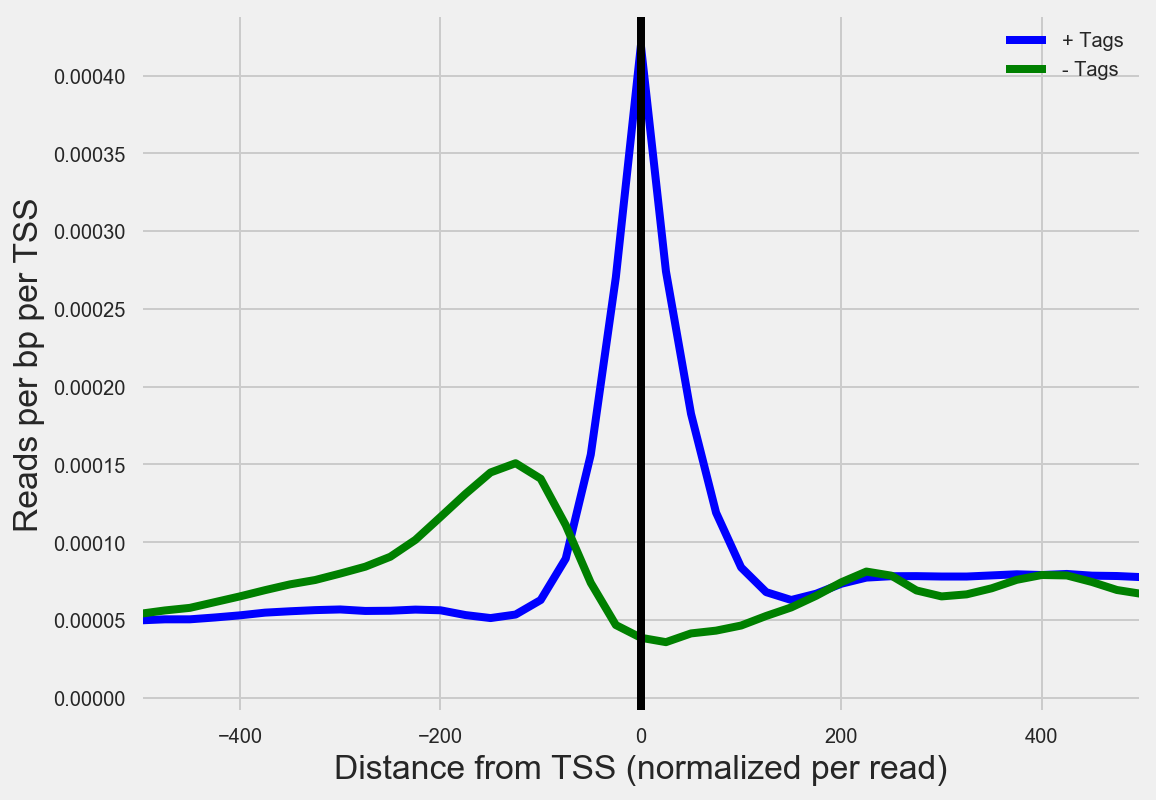

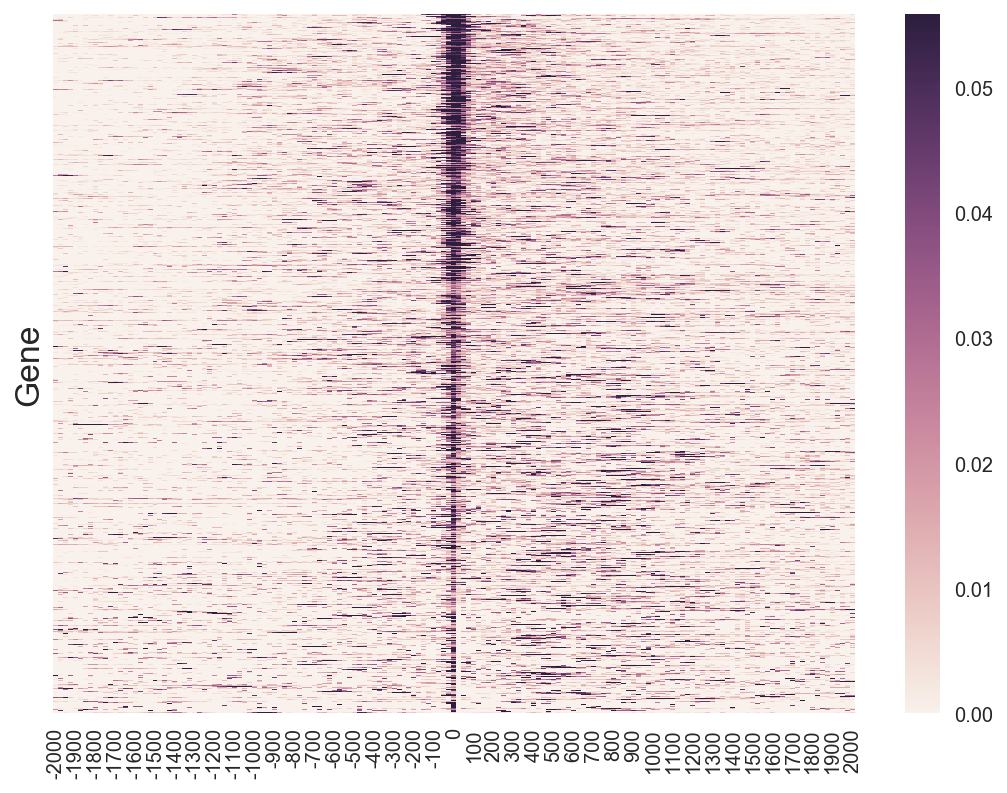

In [4]:
# Refseq 
output_file_mrna = "Results/Figures/Figure3/A.mrna.hist"
print('output histogram mrna',output_file_mrna)
hist(tag_f,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
hist_plot(output_file_mrna)
heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )

# Experimental 
output_file_exp = "Results/Figures/Figure3/A.exp.hist"
print('output histogram exp',output_file_exp)
hist(tag_f,output_file_exp,ref_fa,anno_gff,mode='peak',peak=peak_f,region=4000,res=25,pc=3)
hist_plot(output_file_exp)
heat_df = heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )

0.0209698288974
[-35.54500194  39.53761984]
Max value: 0.0419396577948
Full-width at half-maximum: 75.0826217745 (nts)
0.0141764288934
[ -22.82110177  160.06832123]
Max value: 0.0283528577867
Full-width at half-maximum: 182.889423005 (nts)


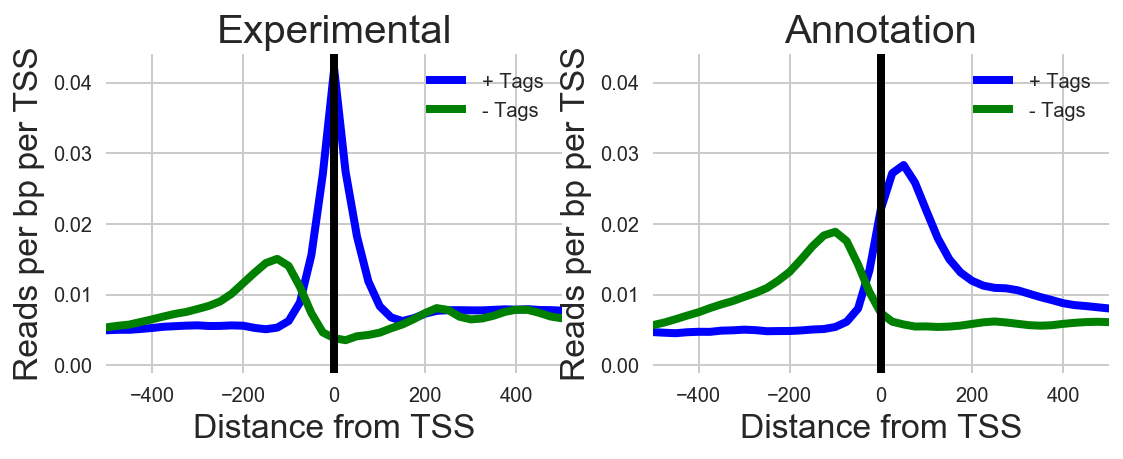

In [ ]:
wrap_hist_plot([output_file_exp,
                output_file_mrna], hist_save="Results/Figures/Figure3/A.combine.png",
                    names=["Experimental","Annotation"])

## ii. Tags from CHO GRO-Cap

In [ ]:
# Refseq 

peak_f = "Results/output/TSS1.exp.bed"
i = peak_f
tag_f = os.path.join(data_folder,"CHO/GROCap/f03_tags/trim_CHO_GROCap1.fastq")

## Create RefSeq peak file for this
mrna_filt = "Results/Figures/Figure3/A_ii.mrna"
peakFileToPeakFile(mRNA_peak_file,i,distance=1000,f_save=mrna_filt,is_peak=False,is_bed=True)
output_file_mrna = "Results/Figures/Figure3/A_ii.mrna.hist"
print('output histogram mrna',output_file_mrna)
hist(tag_f,output_file_mrna,ref_fa,anno_gff,mode='peak',peak=mrna_filt+'filt',region=4000,res=25,pc=3)
hist_plot(output_file_mrna)
heat_plot(output_file_mrna+'MatS',save_f = output_file_mrna + '.heat.png' )

# Experimental 
output_file_exp = "Results/Figures/Figure3/A_ii.exp.hist"
print('output histogram exp',output_file_exp)
hist(tag_f,output_file_exp,ref_fa,anno_gff,mode='peak',peak=peak_f,region=4000,res=25,pc=3)
hist_plot(output_file_exp)
heat_df = heat_plot(output_file_exp+'MatS',save_f = output_file_exp + '.heat.png' )

('output histogram mrna', 'Results/Figures/Figure3/A_ii.mrna.hist')
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -d /data/isshamie/TSS/1015_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1.fastq -pc 3 > Results/Figures/Figure3/A_ii.mrna.hist
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -histNorm 100 -d /data/isshamie/TSS/1015_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1.fastq -pc 3 > Results/Figures/Figure3/A_ii.mrna.histNorm
annotatePeaks.pl Results/Figures/Figure3/A_ii.mrnafilt /data/isshamie/genome/picr_final/picr.fa -gff /data/isshamie/genome/picr_final/final.gff3 -fragLength 1 -size 4000 -hist 25 -ghist -d /data/isshamie/TSS/1015_Processed/CHO/GROCap/f03_tags/trim_CHO_GROCap1.fastq -pc 3 -strand + > Results/Figures/Fi

## iii. Peaks 

# C. 

## i. 

In [ ]:
mrna_filt = "Results/Figures/Figure3/A.mrna"
homer_nucleotide(mrna_filt+'filt',
    'Results/Figures/Figure3/C_i_refseq.nuc_freq_200.txt',
    ref_fa,
    size=200)

In [ ]:
homer_nucleotide("Results/output/TSS1.exp.bed",
    'Results/Figures/Figure3/C_i_exp.nuc_freq_200.txt',
    ref_fa,
    size=200)

## ii. CHO-specific peaks and CHO-specific tags

In [ ]:
mrna_filt = "Results/Figures/Figure3/A_ii.mrna"
homer_nucleotide(mrna_filt+'filt',
    'Results/Figures/Figure3/C_ii_refseq.nuc_freq_200.txt',
    ref_fa,
    size=200)

In [ ]:
homer_nucleotide("Results/tss_annotation_peaks/sample_CHO_GROCap1_and_CHO_GRO1.tsv",
    'Results/Figures/Figure3/C_ii_exp.nuc_freq_200.txt',
    ref_fa,
    size=200)